# 4. Neural Network Units

In [2]:
import numpy as np

In [4]:
x = np.array([[1],[0]])
x

array([[1],
       [0]])

In [7]:
w = np.array([[1],[-1]])
w

array([[ 1],
       [-1]])

In [14]:
w_0 = -3
w_0

-3

In [15]:
z = w_0 + np.dot(x.transpose(),w)
z

array([[-2]])

In [18]:
y_hat = max(0,z)
y_hat

0

# 6. Hidden Layer Models

>For the following set of problems, let's consider a simple 2-dimensional classification task. The training set is made up of  4  points listed below:

> $\displaystyle  x^{(1)} = (-1, -1)$ , $\displaystyle  \quad y^{(1)} = 1$ 

> $\displaystyle x^{(2)} = (1, -1)$ , $\displaystyle  \quad y^{(2)} = -1$ 

> $\displaystyle x^{(3)} = (-1, 1)$ , $\displaystyle  \quad y^{(3)} = -1$ 

> $\displaystyle x^{(4)} = (1, 1)$ , $\displaystyle  \quad y^{(4)} = 1$ 

> The dataset is illustrated below (blue - positive, red - negative)
> For simplicity, assume that we are only interested in binary classification problems for now. That is,  𝑦(𝑖)  can be either  1  or  −1 .

In [21]:
import matplotlib.pyplot as plt

In [22]:
x_1, x_2, x_3, x_4 = np.array([-1,-1]), np.array([1,-1]), np.array([-1,1]), np.array([1,1])
y_1, y_2, y_3, y_4 = 1, -1, -1, 1

<Figure size 432x288 with 0 Axes>

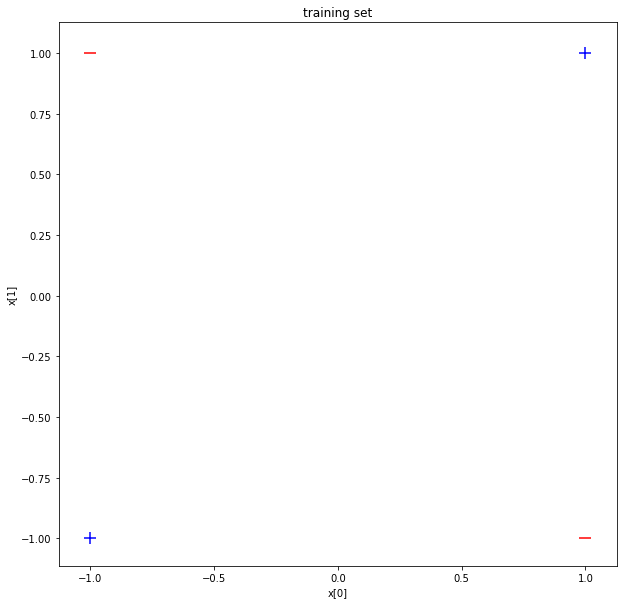

In [222]:
fig = plt.figure()

fig, ax = plt.subplots(figsize=(10, 10))
ax.scatter(x_1[0], x_1[1], s=150, c='blue', marker='+')
ax.scatter(x_2[0], x_2[1], s=150, c='red', marker='_')
ax.scatter(x_3[0], x_3[1], s=150, c='red', marker='_')
ax.scatter(x_4[0], x_4[1], s=150, c='blue', marker='+')

ax.set_title('training set')
ax.set_xlabel('x[0]')
ax.set_ylabel('x[1]')

plt.show()

## Linear Separability After First Layer

>For this problem, let us focus on a network with one hidden layer and two units in that layer:

![Linear Separability After First Layer](./image/image1.png)

>Let $f^{(i)}_1, f^{(i)}_2$, denote the output of the two units in the hidden layer corresponding to the input $x^{(i)}$ respectively, i.e.

> $\displaystyle  \displaystyle f^{(i)}_1$ $\displaystyle =$ $\displaystyle  f(w_{01} + (w_{11}x^{(i)}_{1} + w_{21} x^{(i)}_{2}))$

> $\displaystyle f^{(i)}_2$ $\displaystyle =$ $\displaystyle  f(w_{02} + (w_{12}x^{(i)}_{1} + w_{22} x^{(i)}_{2}))$

> Consider the set $\displaystyle D' = \left\{  \left(\left[f^{(i)}_1, f^{(i)}_2\right], y^{(i)}\right), \quad i=1,2,3,4 \right\}$

In [205]:
def f(x_i, y_i, W, W_0):
    z_1 = W_0[0] + np.dot(x_i.transpose(), W[0])
    z_2 = W_0[1] + np.dot(x_i.transpose(), W[1])

    f_1_i = 2*z_1-3
    f_2_i = 2*z_2-3
    
    return (f_1_i, f_2_i, y_i)

In [206]:
# 1.
W_1 = np.array([[0, 0],[0, 0]])
W_1_0 = np.array([0, 0])

D_1 = [
    f(x_1, y_1, W_1, W_1_0),
    f(x_2, y_2, W_1, W_1_0),
    f(x_3, y_3, W_1, W_1_0),
    f(x_4, y_4, W_1, W_1_0),
]

D_1

[(-3, -3, 1), (-3, -3, -1), (-3, -3, -1), (-3, -3, 1)]

In [207]:
#2.

W_2 = np.array([[2, 2],[-2, -2]])
W_2_0 = np.array([1, 1])

D_2 = [
    f(x_1, y_1, W_2, W_2_0),
    f(x_2, y_2, W_2, W_2_0),
    f(x_3, y_3, W_2, W_2_0),
    f(x_4, y_4, W_2, W_2_0),
]

D_2

[(-9, 7, 1), (-1, -1, -1), (-1, -1, -1), (7, -9, 1)]

In [208]:
#3.

W_3 = np.array([[-2, -2],[2, 2]])
W_3_0 = np.array([1, 1])

D_3 = [
    f(x_1, y_1, W_2, W_2_0),
    f(x_2, y_2, W_2, W_2_0),
    f(x_3, y_3, W_2, W_2_0),
    f(x_4, y_4, W_2, W_2_0),
]

D_3

[(-9, 7, 1), (-1, -1, -1), (-1, -1, -1), (7, -9, 1)]

<Figure size 432x288 with 0 Axes>

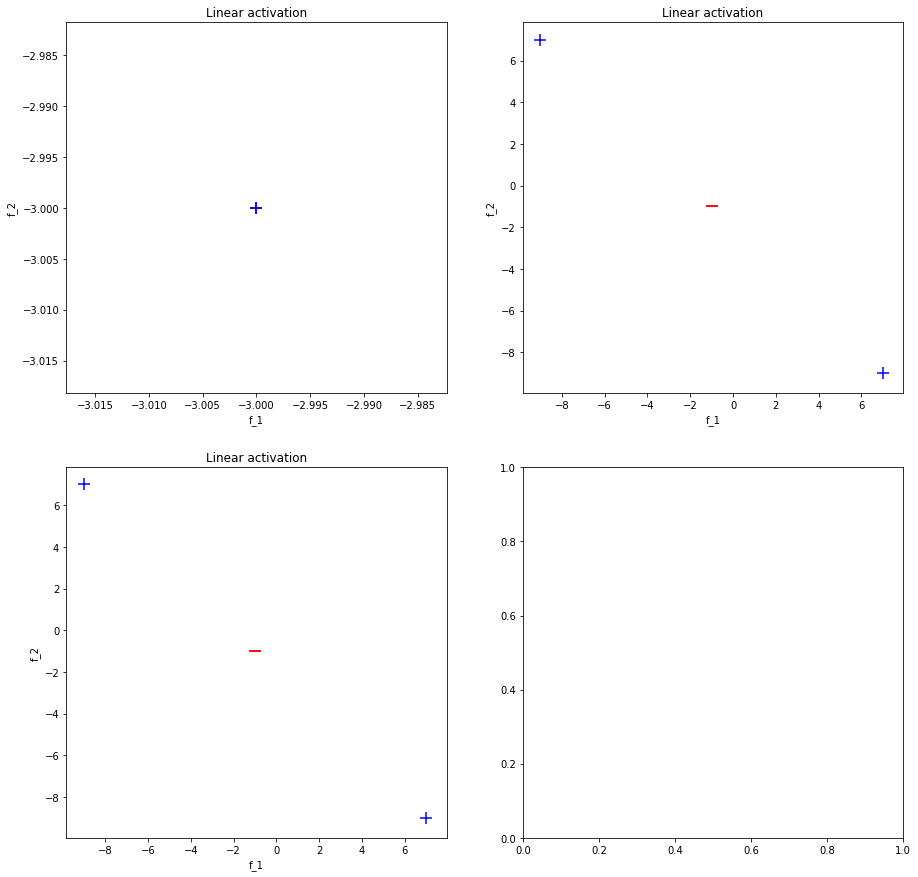

In [223]:
fig2 = plt.figure()

fig2, ax2 = plt.subplots(2, 2, figsize=(15, 15))

# 1.
ax2[0][0].scatter(D_1[0][0], D_1[0][1], s=150, c='blue', marker='+')
ax2[0][0].scatter(D_1[1][0], D_1[1][1], s=150, c='red', marker='_')
ax2[0][0].scatter(D_1[2][0], D_1[2][1], s=150, c='red', marker='_')
ax2[0][0].scatter(D_1[3][0], D_1[3][1], s=150, c='blue', marker='+')

ax2[0][0].set_title('Linear activation')
ax2[0][0].set_xlabel('f_1')
ax2[0][0].set_ylabel('f_2')

# 2.
ax2[0][1].scatter(D_2[0][0], D_2[0][1], s=150, c='blue', marker='+')
ax2[0][1].scatter(D_2[1][0], D_2[1][1], s=150, c='red', marker='_')
ax2[0][1].scatter(D_2[2][0], D_2[2][1], s=150, c='red', marker='_')
ax2[0][1].scatter(D_2[3][0], D_2[3][1], s=150, c='blue', marker='+')

ax2[0][1].set_title('Linear activation')
ax2[0][1].set_xlabel('f_1')
ax2[0][1].set_ylabel('f_2')

# 3.
ax2[1][0].scatter(D_3[0][0], D_3[0][1], s=150, c='blue', marker='+')
ax2[1][0].scatter(D_3[1][0], D_3[1][1], s=150, c='red', marker='_')
ax2[1][0].scatter(D_3[2][0], D_3[2][1], s=150, c='red', marker='_')
ax2[1][0].scatter(D_3[3][0], D_3[3][1], s=150, c='blue', marker='+')

ax2[1][0].set_title('Linear activation')
ax2[1][0].set_xlabel('f_1')
ax2[1][0].set_ylabel('f_2')

plt.show()

- 上図からわかるとおり、 hidden layerを通しても not separable

## Non-linear Activation Functions

> Again, let's focus on a network with one hidden layer with two units and use the same training set as above. The weights of the network are given as follows:

> $\displaystyle  \displaystyle w_{11} = 1, w_{21} = -1, w_{01} = 1$

> $\displaystyle w_{12} = -1, w_{22} = 1, w_{02} = 1$

> Consider the set $D' = \{  ([f^{(i)}_1, f^{(i)}_2], y^{(i)}), \quad i=1,2,3,4 \}$

> For which of the following functions $f$, would the set $D'$ be linearly separable? (Select one or more that apply.)

In [195]:
def f_linear(x_i, y_i, W, W_0):
    z_1 = W_0[0] + np.dot(x_i.transpose(), W[0])
    z_2 = W_0[1] + np.dot(x_i.transpose(), W[1])

    f_1_i = 5*z_1-2
    f_2_i = 5*z_2-2
    
    return (f_1_i, f_2_i, y_i)

In [196]:
def relu(x):
    return np.maximum(0, x)

def f_relu(x_i, y_i, W, W_0):
    z_1 = W_0[0] + np.dot(x_i.transpose(), W[0])
    z_2 = W_0[1] + np.dot(x_i.transpose(), W[1])

    f_1_i = relu(z_1)
    f_2_i = relu(z_2)
    
    return (f_1_i, f_2_i, y_i)

In [197]:
def f_tanh(x_i, y_i, W, W_0):
    z_1 = W_0[0] + np.dot(x_i.transpose(), W[0])
    z_2 = W_0[1] + np.dot(x_i.transpose(), W[1])

    f_1_i = np.tanh(z_1)
    f_2_i = np.tanh(z_2)
    
    return (f_1_i, f_2_i, y_i)

In [211]:
def f_linear2(x_i, y_i, W, W_0):
    z_1 = W_0[0] + np.dot(x_i.transpose(), W[0])
    z_2 = W_0[1] + np.dot(x_i.transpose(), W[1])

    f_1_i = z_1
    f_2_i = z_2
    
    return (f_1_i, f_2_i, y_i)

In [198]:
#4.

W_4 = np.array([[1, -1],[-1, 1]])
W_4_0 = np.array([1, 1])

In [199]:
# linear activation
D_4_linear = [
    f_linear(x_1, y_1, W_2, W_2_0),
    f_linear(x_2, y_2, W_2, W_2_0),
    f_linear(x_3, y_3, W_2, W_2_0),
    f_linear(x_4, y_4, W_2, W_2_0),
]

D_4_linear

[(-17, 23, 1), (3, 3, -1), (3, 3, -1), (23, -17, 1)]

In [200]:
# ReLU activation
D_4_relu = [
    f_relu(x_1, y_1, W_2, W_2_0),
    f_relu(x_2, y_2, W_2, W_2_0),
    f_relu(x_3, y_3, W_2, W_2_0),
    f_relu(x_4, y_4, W_2, W_2_0),
]

D_4_relu

[(0, 5, 1), (1, 1, -1), (1, 1, -1), (5, 0, 1)]

In [201]:
# tanh activation
D_4_tanh = [
    f_tanh(x_1, y_1, W_2, W_2_0),
    f_tanh(x_2, y_2, W_2, W_2_0),
    f_tanh(x_3, y_3, W_2, W_2_0),
    f_tanh(x_4, y_4, W_2, W_2_0),
]

D_4_tanh

[(-0.9950547536867305, 0.9999092042625951, 1),
 (0.7615941559557649, 0.7615941559557649, -1),
 (0.7615941559557649, 0.7615941559557649, -1),
 (0.9999092042625951, -0.9950547536867305, 1)]

In [213]:
# linear activation2
D_4_linear2 = [
    f_linear2(x_1, y_1, W_2, W_2_0),
    f_linear2(x_2, y_2, W_2, W_2_0),
    f_linear2(x_3, y_3, W_2, W_2_0),
    f_linear2(x_4, y_4, W_2, W_2_0),
]

D_4_linear2

[(-3, 5, 1), (1, 1, -1), (1, 1, -1), (5, -3, 1)]

<Figure size 432x288 with 0 Axes>

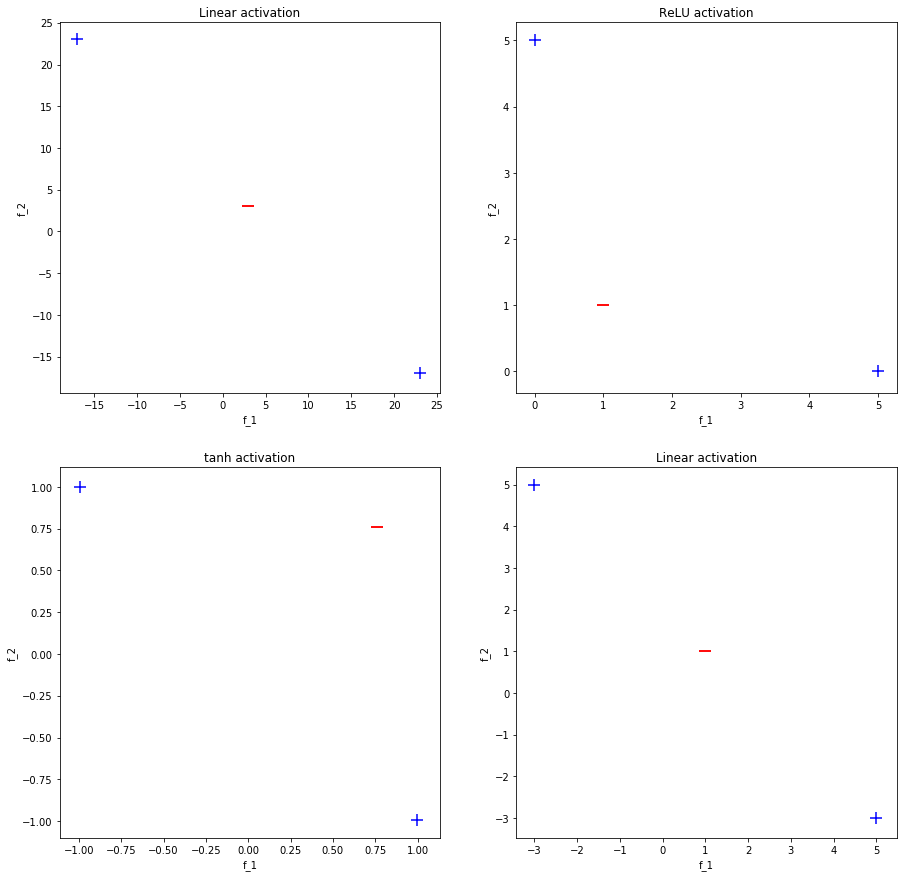

In [226]:
fig3 = plt.figure()

fig3, ax3 = plt.subplots(2, 2, figsize=(15, 15))

# 1.
ax3[0][0].scatter(D_4_linear[0][0], D_4_linear[0][1], s=150, c='blue', marker='+')
ax3[0][0].scatter(D_4_linear[1][0], D_4_linear[1][1], s=150, c='red', marker='_')
ax3[0][0].scatter(D_4_linear[2][0], D_4_linear[2][1], s=150, c='red', marker='_')
ax3[0][0].scatter(D_4_linear[3][0], D_4_linear[3][1], s=150, c='blue', marker='+')

ax3[0][0].set_title('Linear activation')
ax3[0][0].set_xlabel('f_1')
ax3[0][0].set_ylabel('f_2')

# 2.
ax3[0][1].scatter(D_4_relu[0][0], D_4_relu[0][1], s=150, c='blue', marker='+')
ax3[0][1].scatter(D_4_relu[1][0], D_4_relu[1][1], s=150, c='red', marker='_')
ax3[0][1].scatter(D_4_relu[2][0], D_4_relu[2][1], s=150, c='red', marker='_')
ax3[0][1].scatter(D_4_relu[3][0], D_4_relu[3][1], s=150, c='blue', marker='+')

ax3[0][1].set_title('ReLU activation')
ax3[0][1].set_xlabel('f_1')
ax3[0][1].set_ylabel('f_2')

# 3.
ax3[1][0].scatter(D_4_tanh[0][0], D_4_tanh[0][1], s=150, c='blue', marker='+')
ax3[1][0].scatter(D_4_tanh[1][0], D_4_tanh[1][1], s=150, c='red', marker='_')
ax3[1][0].scatter(D_4_tanh[2][0], D_4_tanh[2][1], s=150, c='red', marker='_')
ax3[1][0].scatter(D_4_tanh[3][0], D_4_tanh[3][1], s=150, c='blue', marker='+')

ax3[1][0].set_title('tanh activation')
ax3[1][0].set_xlabel('f_1')
ax3[1][0].set_ylabel('f_2')

# 3.
ax3[1][1].scatter(D_4_linear2[0][0], D_4_linear2[0][1], s=150, c='blue', marker='+')
ax3[1][1].scatter(D_4_linear2[1][0], D_4_linear2[1][1], s=150, c='red', marker='_')
ax3[1][1].scatter(D_4_linear2[2][0], D_4_linear2[2][1], s=150, c='red', marker='_')
ax3[1][1].scatter(D_4_linear2[3][0], D_4_linear2[3][1], s=150, c='blue', marker='+')

ax3[1][1].set_title('Linear activation')
ax3[1][1].set_xlabel('f_1')
ax3[1][1].set_ylabel('f_2')

plt.show()

- 上記のグラフより、ReLU, tanhがactivation functionの時linealy separabel